In [10]:
# import nibabel
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pydicom

In [6]:
base_dir = Path("./data")

Load a dicom file

In [82]:
dicom_file = pydicom.dcmread(base_dir/'out'/'0.dcm')

In [83]:
dicom_file

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 258
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.1.25224308956717159557586895448971109
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.3.0.10.111.124.113
(0002, 0013) Implementation Version Name         SH: 'GDCM 3.0.10'
(0002, 0016) Source Application Entity Title     AE: 'GDCM/ITK 5.3.0'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0012) Instance Creation Date              DA: '20221124'
(0008, 0013) Instance Creation Time              TM: '195439'
(0008, 0016) SOP Class UID                       UI: CT

In [84]:
z = dicom_file.overlay_array(0x6000)
z.shape

c:\Users\danie\Documents\2_Uni\HPI_Potsdam\WiSe 22-23\BP\DICOM_Export\venv_dicom\lib\site-packages\pydicom\overlays\numpy_handler.py:249: UserWarning: The length of the overlay data in the dataset (300 bytes) indicates it contains excess padding. 250 bytes will be removed from the end of the data
  f"The length of the overlay data in the dataset ({actual_length} "


(20, 20)

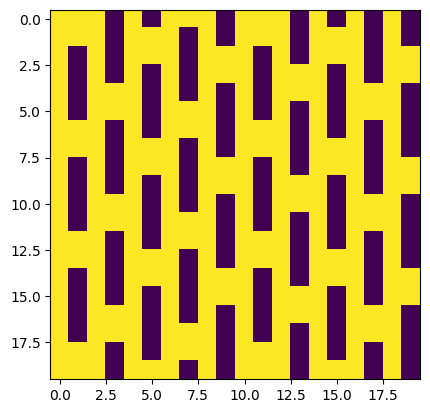

In [85]:
plt.imshow(z)


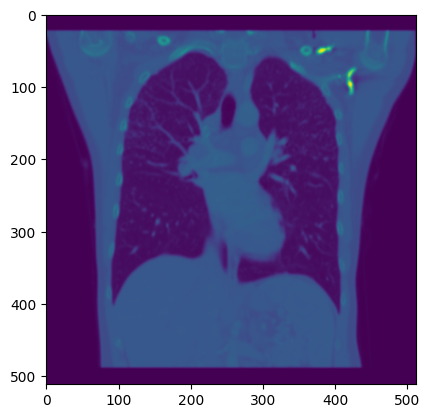

In [81]:
plt.imshow(dicom_file.pixel_array)

In [51]:
from bitarray import bitarray
rows = 512
cols = rows

bit_array = bitarray(rows*cols)
bit_array.setall(0)
for i in range(int(len(bit_array) / 2)):
    bit_array[i] = 1
x = bit_array.tolist()

overlay_size = rows*cols
bits = "1"*(int(overlay_size/2)) + "0"*(overlay_size-int(overlay_size/2))
len(bits) / 512

512.0

In [30]:
bit_array.nbytes

13

### Write

In [52]:
import pydicom
from pydicom.dataset import Dataset, FileMetaDataset, FileDataset
from pydicom.sequence import Sequence
import datetime
import os
import tempfile
from pydicom.uid import UID

def create_from_dicom(pixel_data):
    # File meta info data elements
    file_meta = FileMetaDataset()
    file_meta.FileMetaInformationGroupLength = 150
    file_meta.FileMetaInformationVersion = b'\x00\x01'
    file_meta.MediaStorageSOPClassUID = '1.2.840.10008.5.1.4.1.1.12.1'
    file_meta.MediaStorageSOPInstanceUID = '1.3.12.2.1107.5.4.3.321890.19960124.162922.29'
    file_meta.TransferSyntaxUID = '1.2.840.10008.1.2.4.50'
    file_meta.ImplementationClassUID = '999.999'

    # Main data elements
    ds = Dataset()
    ds.ImageType = ['DERIVED', 'PRIMARY', 'SINGLE PLANE', 'SINGLE A']
    ds.SOPClassUID = '1.2.840.10008.5.1.4.1.1.12.1'
    ds.SOPInstanceUID = '1.3.12.2.1107.5.4.3.321890.19960124.162922.29'
    ds.StudyDate = '19941013'
    ds.StudyTime = '141917'
    ds.AccessionNumber = ''
    ds.Modality = 'XA'
    ds.Manufacturer = ''
    ds.InstitutionName = ''
    ds.InstitutionAddress = ''
    ds.ReferringPhysicianName = ''
    ds.StudyDescription = ''
    ds.PerformingPhysicianName = ''
    ds.LossyImageCompressionRetired = '01'

    # Source Image Sequence
    source_image_sequence = Sequence()
    ds.SourceImageSequence = source_image_sequence

    # Source Image Sequence: Source Image 1
    source_image1 = Dataset()
    source_image1.ReferencedSOPClassUID = '1.2.840.10008.5.1.4.1.1.12.1'
    source_image1.ReferencedSOPInstanceUID = '1.3.12.2.1107.5.4.3.321890.19960124.162922.28'
    source_image_sequence.append(source_image1)

    ds.PatientName = 'Rubo DEMO'
    ds.PatientID = '556342B'
    ds.PatientBirthDate = '19951025'
    ds.PatientSex = 'M'
    ds.KVP = None
    ds.FrameTime = '33.0'
    ds.Exposure = None
    ds.RadiationSetting = 'GR'
    ds.PositionerMotion = ''
    ds.PositionerPrimaryAngle = '-32.0'
    ds.PositionerSecondaryAngle = '2.0'
    ds.StudyInstanceUID = '1.3.12.2.1107.5.4.3.123456789012345.19950922.121803.6'
    ds.SeriesInstanceUID = '1.3.12.2.1107.5.4.3.123456789012345.19950922.121803.8'
    ds.StudyID = ''
    ds.SeriesNumber = '1'
    ds.InstanceNumber = None
    ds.PatientOrientation = ''
    ds.SamplesPerPixel = 1
    ds.PhotometricInterpretation = 'MONOCHROME2'
    ds.NumberOfFrames = '96'
    ds.FrameIncrementPointer = (18, 1063)
    ds.Rows = 512
    ds.Columns = 512
    ds.BitsAllocated = 8
    ds.BitsStored = 8
    ds.HighBit = 7
    ds.PixelRepresentation = 0
    ds.PixelIntensityRelationship = 'LIN'
    ds.RecommendedViewingMode = 'NAT'
    ds.RWavePointer = [20, 53, 77]

    # Mask Subtraction Sequence
    mask_subtraction_sequence = Sequence()
    ds.MaskSubtractionSequence = mask_subtraction_sequence

    # Mask Subtraction Sequence: Mask Subtraction 1
    mask_subtraction1 = Dataset()
    mask_subtraction1.MaskOperation = 'NONE'
    mask_subtraction1.MaskFrameNumbers = 0
    mask_subtraction_sequence.append(mask_subtraction1)

    ds.CurveDimensions = 2
    ds.NumberOfPoints = 3840
    ds.TypeOfData = 'ECG'
    ds.AxisUnits = ['DPPS', 'NONE']
    ds.DataValueRepresentation = 0
    ds.MinimumCoordinateValue = None
    ds.MaximumCoordinateValue = None
    ds.CurveRange = None
    ds.CurveDataDescriptor = [0, 1]
    ds.CoordinateStartValue = 0
    ds.CoordinateStepValue = 40
    ds.CurveData = np.zeros(7680, dtype='uint8').tobytes()# XXX Array of 7680 bytes excluded
    ds.PixelData = pixel_data# XXX Array of 1691664 bytes excluded

    ds.file_meta = file_meta
    ds.is_implicit_VR = False
    ds.is_little_endian = True
    ds.save_as(r'.\data\0002_from_codify.dcm', write_like_original=False)
    print("ok")


In [ ]:
# Produced by pydicom codify utility script
import pydicom
from pydicom.dataset import Dataset, FileMetaDataset
from pydicom.sequence import Sequence

# File meta info data elements
file_meta = FileMetaDataset()
file_meta.FileMetaInformationGroupLength = 150
file_meta.FileMetaInformationVersion = b'\x00\x01'
file_meta.MediaStorageSOPClassUID = '1.2.840.10008.5.1.4.1.1.12.1'
file_meta.MediaStorageSOPInstanceUID = '1.3.12.2.1107.5.4.3.321890.19960124.162922.29'
file_meta.TransferSyntaxUID = '1.2.840.10008.1.2.4.50'
file_meta.ImplementationClassUID = '999.999'

# Main data elements
ds = Dataset()
ds.ImageType = ['DERIVED', 'PRIMARY', 'SINGLE PLANE', 'SINGLE A']
ds.SOPClassUID = '1.2.840.10008.5.1.4.1.1.12.1'
ds.SOPInstanceUID = '1.3.12.2.1107.5.4.3.321890.19960124.162922.29'
ds.StudyDate = '19941013'
ds.StudyTime = '141917'
ds.AccessionNumber = ''
ds.Modality = 'XA'
ds.Manufacturer = ''
ds.InstitutionName = ''
ds.InstitutionAddress = ''
ds.ReferringPhysicianName = ''
ds.StudyDescription = ''
ds.PerformingPhysicianName = ''
ds.LossyImageCompressionRetired = '01'

# Source Image Sequence
source_image_sequence = Sequence()
ds.SourceImageSequence = source_image_sequence

# Source Image Sequence: Source Image 1
source_image1 = Dataset()
source_image1.ReferencedSOPClassUID = '1.2.840.10008.5.1.4.1.1.12.1'
source_image1.ReferencedSOPInstanceUID = '1.3.12.2.1107.5.4.3.321890.19960124.162922.28'
source_image_sequence.append(source_image1)

ds.PatientName = 'Rubo DEMO'
ds.PatientID = '556342B'
ds.PatientBirthDate = '19951025'
ds.PatientSex = 'M'
ds.KVP = None
ds.FrameTime = '33.0'
ds.Exposure = None
ds.RadiationSetting = 'GR'
ds.PositionerMotion = ''
ds.PositionerPrimaryAngle = '-32.0'
ds.PositionerSecondaryAngle = '2.0'
ds.StudyInstanceUID = '1.3.12.2.1107.5.4.3.123456789012345.19950922.121803.6'
ds.SeriesInstanceUID = '1.3.12.2.1107.5.4.3.123456789012345.19950922.121803.8'
ds.StudyID = ''
ds.SeriesNumber = '1'
ds.InstanceNumber = None
ds.PatientOrientation = ''
ds.SamplesPerPixel = 1
ds.PhotometricInterpretation = 'MONOCHROME2'
ds.NumberOfFrames = '96'
ds.FrameIncrementPointer = (18, 1063)
ds.Rows = 512
ds.Columns = 512
ds.BitsAllocated = 8
ds.BitsStored = 8
ds.HighBit = 7
ds.PixelRepresentation = 0
ds.PixelIntensityRelationship = 'LIN'
ds.RecommendedViewingMode = 'NAT'
ds.RWavePointer = [20, 53, 77]

# Mask Subtraction Sequence
mask_subtraction_sequence = Sequence()
ds.MaskSubtractionSequence = mask_subtraction_sequence

# Mask Subtraction Sequence: Mask Subtraction 1
mask_subtraction1 = Dataset()
mask_subtraction1.MaskOperation = 'NONE'
mask_subtraction1.MaskFrameNumbers = 0
mask_subtraction_sequence.append(mask_subtraction1)

ds.CurveDimensions = 2
ds.NumberOfPoints = 3840
ds.TypeOfData = 'ECG'
ds.AxisUnits = ['DPPS', 'NONE']
ds.DataValueRepresentation = 0
ds.MinimumCoordinateValue = None
ds.MaximumCoordinateValue = None
ds.CurveRange = None
ds.CurveDataDescriptor = [0, 1]
ds.CoordinateStartValue = 0
ds.CoordinateStepValue = 40
ds.CurveData = np.zeros(7680, dtype='uint8').tobytes()# XXX Array of 7680 bytes excluded
ds.PixelData = np.zeros(1691664, dtype='uint8').tobytes()# XXX Array of 1691664 bytes excluded

ds.file_meta = file_meta
ds.is_implicit_VR = False
ds.is_little_endian = True
ds.save_as(r'.\data\0002_from_codify.dcm', write_like_original=False)

In [ ]:
#=========================================================================
#
#  Copyright Insight Software Consortium
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#         http://www.apache.org/licenses/LICENSE-2.0.txt
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
#
#=========================================================================

from __future__ import print_function

import SimpleITK as sitk

import sys, time, os

if len( sys.argv ) < 3:
    print( "Usage: python " + __file__ + " <input_directory_with_DICOM_series> <output_directory>" )
    sys.exit ( 1 )

# Read the original series. First obtain the series file names using the
# image series reader. Then read each image using an image reader that is
# set to load all DICOM tags (public+private). The resulting images contain
# their DICOM meta-data dictionaries.
data_directory = sys.argv[1]
series_reader = sitk.ImageSeriesReader()
series_IDs = series_reader.GetGDCMSeriesIDs(data_directory)
if not series_IDs:
    print("ERROR: given directory \""+data_directory+"\" does not contain a DICOM series.")
    sys.exit(1)
series_file_names = series_reader.GetGDCMSeriesFileNames(data_directory, series_IDs[0])

image_reader = sitk.ImageFileReader()
image_reader.LoadPrivateTagsOn()
image_list = []
for file_name in series_file_names:
    image_reader.SetFileName(file_name)
    image_list.append(image_reader.Execute())

# Pasting all of the slices into a 3D volume requires 2D image slices and not 3D slices
# The volume's origin and direction are taken from the first slice and the spacing from
# the difference between the first two slices. Note that we are assuming we are
# dealing with a volume represented by axial slices (z spacing is difference between images).
image_list2D = [image[:,:,0] for image in image_list]
image3D = sitk.JoinSeries(image_list2D, image_list[0].GetOrigin()[2], image_list[1].GetOrigin()[2] - image_list[0].GetOrigin()[2])
image3D.SetDirection(image_list[0].GetDirection())

# Modify the image (blurring)
filtered_image = sitk.DiscreteGaussian(image3D)

# Write the 3D image as a series
# IMPORTANT: There are many DICOM tags that need to be updated when you modify an
#            original image. This is a delicate opration and requires knowlege of
#            the DICOM standard. This example only modifies some. For a more complete
#            list of tags that need to be modified see:
#                           http://gdcm.sourceforge.net/wiki/index.php/Writing_DICOM

writer = sitk.ImageFileWriter()
# Use the study/seriers/frame of reference information given in the meta-data
# dictionary and not the automatically generated information from the file IO
writer.KeepOriginalImageUIDOn()
modification_time = time.strftime("%H%M%S")
modification_date = time.strftime("%Y%m%d")
for i in range(filtered_image.GetDepth()):
    image_slice = filtered_image[:,:,i]
    original_slice = image_list[i]
    # Copy the meta-data except the rescale-intercept, rescale-slope
    for k in original_slice.GetMetaDataKeys():
        if k!="0028|1052" and k!= "0028|1053":
            image_slice.SetMetaData(k, original_slice.GetMetaData(k))
    # Set relevant keys indicating the change, modify or remove private tags as needed
    image_slice.SetMetaData("0008|0031", modification_time)
    image_slice.SetMetaData("0008|0021", modification_date)
    image_slice.SetMetaData("0008|0008", "DERIVED\SECONDARY")
    # Each of the UID components is a number (cannot start with zero) and separated by a '.'
    # We create a unique series ID using the date and time.
    image_slice.SetMetaData("0020|000e", "1.2.826.0.1.3680043.2.1125."+modification_date+".1"+modification_time)
    # Write to the output directory and add the extension dcm if not there, to force writing is in DICOM format.
    writer.SetFileName(os.path.join(sys.argv[2], os.path.basename(series_file_names[i])) + ('' if os.path.splitext(series_file_names[i])[1] == '.dcm' else '.dcm'))
    writer.Execute(image_slice)
sys.exit( 0 )


In [51]:
x = 
len(x)

7680

In [53]:
pixel_data = dicom_file.PixelData

print(len(pixel_data))
create_from_dicom(pixel_data=pixel_data)


1691664


ValueError: 'CurveDimensions' is a DICOM repeating group element and must be added using the add() or add_new() methods.

Combine the files

In [189]:
nifti_slice = nifti_file.get_fdata().astype('uint16')[:,:,80:85]
nifti_slice.shape

(240, 240, 5)

In [190]:
def convert(nifti_file, dicom_file, slice_index=80):
    nifti_slice = nifti_file.get_fdata().astype('uint8')[:,:,:96]
    nifti_slice = np.moveaxis(nifti_slice, 2, 0)[:96,:,:]
    print(nifti_slice.shape)
    dicom_file.Rows = nifti_slice.shape[0]
    dicom_file.Columns = nifti_slice.shape[1]
    dicom_file.PhotometricInterpretation = "MONOCHROME 2"
    dicom_file.SamplesPerPixel = 1
    dicom_file.BitsStored = 8
    dicom_file.BitsAllocated = 8
    dicom_file.HighBit = 7
    dicom_file.PixelRepresentation = 0
    dicom_file.PixelData = nifti_slice.tobytes()
    return dicom_file

In [191]:
df = convert(nifti_file, dicom_file)

(96, 240, 240)


In [192]:
df.save_as(base_dir/"dcmimage2.dcm")

ValueError: With tag (7fe0, 0010) got exception: (7FE0,0010) Pixel Data has an undefined length indicating that it's compressed, but the data isn't encapsulated as required. See pydicom.encaps.encapsulate() for more information
Traceback (most recent call last):
  File "c:\Users\danie\Documents\2_Uni\HPI_Potsdam\WiSe 22-23\BP\Prototype\annotation-prototype\venv\lib\site-packages\pydicom\tag.py", line 28, in tag_in_exception
    yield
  File "c:\Users\danie\Documents\2_Uni\HPI_Potsdam\WiSe 22-23\BP\Prototype\annotation-prototype\venv\lib\site-packages\pydicom\filewriter.py", line 662, in write_dataset
    write_data_element(fp, dataset.get_item(tag), dataset_encoding)
  File "c:\Users\danie\Documents\2_Uni\HPI_Potsdam\WiSe 22-23\BP\Prototype\annotation-prototype\venv\lib\site-packages\pydicom\filewriter.py", line 580, in write_data_element
    "(7FE0,0010) Pixel Data has an undefined length indicating "
ValueError: (7FE0,0010) Pixel Data has an undefined length indicating that it's compressed, but the data isn't encapsulated as required. See pydicom.encaps.encapsulate() for more information


Check the result

In [127]:
dicom_file = pydicom.dcmread(base_dir/'dcmimage2.dcm')
# plt.imshow(dicom_file.pixel_array)
dicom_file.pixel_array.shape

AttributeError: Unable to convert the pixel data as the following conditionally required element is missing from the dataset: PlanarConfiguration

In [ ]:
def convertNsave(arr,file_dir, index=0):
    """
    `arr`: parameter will take a numpy array that represents only one slice.
    `file_dir`: parameter will take the path to save the slices
    `index`: parameter will represent the index of the slice, so this parameter will be used to put 
    the name of each slice while using a for loop to convert all the slices
    """
    
    dicom_file = pydicom.dcmread('images/dcmimage.dcm')
    arr = arr.astype('uint16')
    dicom_file.Rows = arr.shape[0]
    dicom_file.Columns = arr.shape[1]
    dicom_file.PhotometricInterpretation = "MONOCHROME2"
    dicom_file.SamplesPerPixel = 1
    dicom_file.BitsStored = 16
    dicom_file.BitsAllocated = 16
    dicom_file.HighBit = 15
    dicom_file.PixelRepresentation = 1
    dicom_file.PixelData = arr.tobytes()